<a href="https://colab.research.google.com/github/mirjanaa/Bee-Colony-Optimization/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [150]:
import random
import numpy as np
from matplotlib import pyplot as plt

In [151]:
class FoodSource:
  def __init__(self, bounds, obj_function):
    self.position = np.array([random.uniform(bound[0], bound[1]) for bound in bounds])
    self.obj_value = obj_function(self.position)
    self.fitness = self.calculate_fitness()
    self.trial = 0
    self.probability = 0

  def __lt__(self, other):
    return self.obj_value < other.obj_value

  def __gt__(self, other):
    return self.fitness > other.fitness

  def calculate_fitness(self):
    if self.obj_value >= 0:
      return 1 / (1 + self.obj_value)
    return 1 + abs(self.obj_value) 

In [152]:
def rastrigin(x):
    A = 10
    n = len(x)
    return A*n + sum(x_i**2 - A*np.cos(2*np.pi*x_i) for x_i in x)

In [153]:
def rosenbrock(x):
    a = 1
    b = 100
    return (a - x[0]) ** 2 + b * (x[1] - x[0]**2)**2

In [154]:
bounds = np.array([(-5.12, 5.12), (-5.12, 5.12)])

In [155]:
def generate_new_solution(i, population, lb, ub, obj_function):

  j = random.randrange(len(bounds))
  partner = random.randrange(len(population))

  while i == partner:
    partner = random.randrange(len(population))

  phi = random.uniform(-1, 1)

  old_fitness = population[i].fitness
  old_objective_value = population[i].obj_value

  old_j = population[i].position[j]
  new_j = population[i].position[j] + phi * (population[i].position[j] - population[partner].position[j])

  population[i].position[j] = new_j
  population[i].position[j] = np.clip(population[i].position[j], lb[j], ub[j])
  
  new_objective_value = obj_function(population[i].position)
   
  population[i].obj_value = new_objective_value
  population[i].fitness = population[i].calculate_fitness()

  if population[i].fitness > old_fitness:
    population[i].trial = 0
  
  else:
    population[i].position[j] = old_j
    population[i].obj_value = old_objective_value
    population[i].fitness = old_fitness
    population[i].trial = population[i].trial + 1 

  

In [156]:
def ABC_algorithm(population_size, num_of_iters, limit, obj_function):

  POPULATION_SIZE = population_size
  NUM_OF_ITERATIONS = num_of_iters
  LIMIT = limit

  lower_bound = np.array([x[0] for x in bounds])
  upper_bound = np.array([x[1] for x in bounds])


  population = [FoodSource(bounds, obj_function) for _ in range(POPULATION_SIZE)]

  best_solution = min(population)

  obj_values = []
  fitness_values = []

  for k in range(NUM_OF_ITERATIONS):
    #### Employed Bee Phase ####
    for i in range(POPULATION_SIZE):
      generate_new_solution(i, population, lower_bound, upper_bound, obj_function)

    #### Onlooker Bee Phase ####
    max_fitness = max([population[i].fitness for i in range(POPULATION_SIZE)])
    for i in range(POPULATION_SIZE):
      population[i].probability = 0.9 * (population[i].fitness / max_fitness) + 0.1


    m = 0
    n = 0

    while m < POPULATION_SIZE and n < POPULATION_SIZE:
      rand_value = random.uniform(0, 1)
      if rand_value < population[n].probability:
        generate_new_solution(n, population, lower_bound, upper_bound, obj_function)
        m += 1
      n = (n % POPULATION_SIZE) + 1

    best_solution = min(min(population), best_solution)

    #### Scout Bee Phase ####
    max_index = -1
    max_trial = float('-inf')
    for index, p in enumerate(population):
      if p.trial > max_trial:
        max_trial = p.trial
        max_index = index


    if population[max_index].trial > LIMIT:
      population[max_index] = FoodSource(bounds, obj_function)

    best_solution = min(min(population), best_solution)

    obj_values.append(best_solution.obj_value)
    fitness_values.append(best_solution.fitness)

  print("position: ", [i for i in best_solution.position])
  print("objective value: ", best_solution.obj_value)
  print("fitness value: ", best_solution.fitness)

  #plt.plot(range(NUM_OF_ITERATIONS), obj_values)
  #plt.plot(range(NUM_OF_ITERATIONS), fitness_values)
  return best_solution, obj_values, fitness_values

position:  [1.0485940737511776, -0.9226903990703118]
objective value:  3.57016786998269
fitness value:  0.21881034317537829
position:  [-1.5574997062137212, 2.4331759060675995]
objective value:  6.54623727928205
fitness value:  0.13251637378875797
position:  [0.003028366349040801, -0.014362102483568062]
objective value:  0.04271411086609689
fitness value:  0.9590356451294039
position:  [0.6571394528624315, 0.4920259167909765]
objective value:  0.4798809804507422
fitness value:  0.6757300169473223
position:  [-0.0060367410168312985, 0.056476193890619864]
objective value:  0.6334337431663286
fitness value:  0.6122072622679819
position:  [1.0498852622882282, 1.1129768410722702]
objective value:  0.013975613994913368
fitness value:  0.9862170117288604
position:  [-0.025098017250577698, -0.04874688432982865]
objective value:  0.5924873029788245
fitness value:  0.6279484917270308
position:  [0.7143899983247045, 0.49719266891328456]
objective value:  0.09889268796043006
fitness value:  0.9100

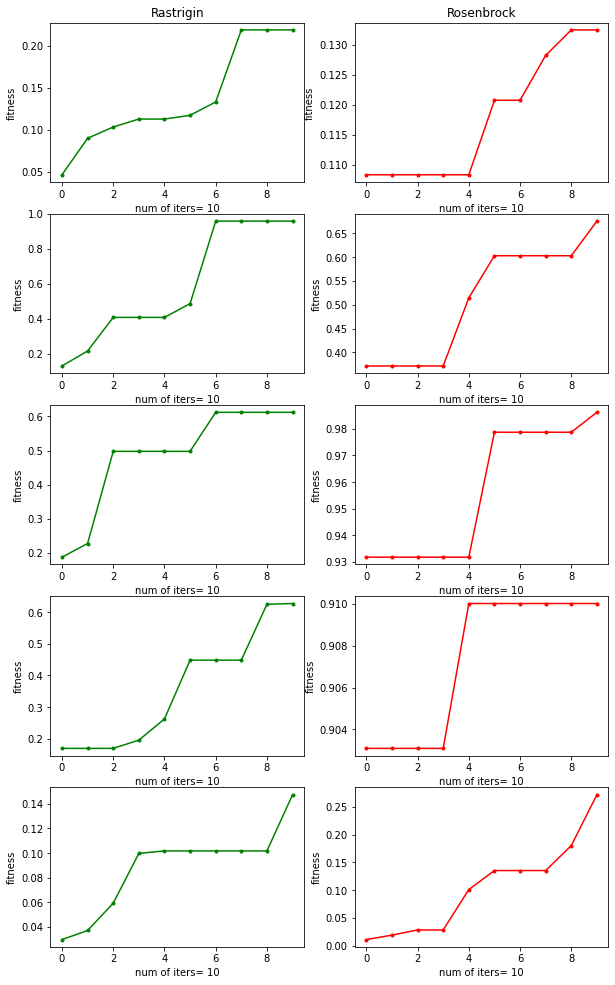

In [157]:
population_size = [5, 50, 100, 300]
num_iters = [10, 100]
limit = [2, 5]

cols = ['Rastrigin', 'Rosenbrock']

tmp=5

plt.figure(figsize=(10, 17))

p = random.sample(population_size, k=1)[0]
n = random.sample(num_iters, k=1)[0]
l = random.sample(limit, k=1)[0]

best_solution, _, fitness_values = ABC_algorithm(p, n, l, rastrigin)
plt.subplot(tmp, 2, 1)
plt.plot(range(n), fitness_values, color='green', marker='.')
plt.xlabel("num of iters= " + str(n))
plt.ylabel("fitness")
plt.title('Rastrigin')

best_solution, _, fitness_values = ABC_algorithm(p, n, l, rosenbrock)
plt.subplot(tmp, 2, 2)
plt.plot(range(n), fitness_values, color='red', marker='.')
plt.xlabel("num of iters= " + str(n))
plt.ylabel("fitness")
plt.title('Rosenbrock')


for i in range(1, tmp):
  p = random.sample(population_size, k=1)[0]
  n = random.sample(num_iters, k=1)[0]
  l = random.sample(limit, k=1)[0]

  best_solution, _, fitness_values = ABC_algorithm(p, n, l, rastrigin)
  plt.subplot(tmp, 2, 2*i+1)
  plt.plot(range(n), fitness_values, color='green', marker='.')
  plt.xlabel("num of iters= " + str(n))
  plt.ylabel("fitness")

  best_solution, _, fitness_values = ABC_algorithm(p, n, l, rosenbrock)
  plt.subplot(tmp, 2, 2*i+2)
  plt.plot(range(n), fitness_values, color='red', marker='.')
  plt.xlabel("num of iters= " + str(n))
  plt.ylabel("fitness")

plt.show()



position:  [-3.1992858782234823e-09, 1.6377045304755056e-09]
objective value:  0.0
fitness value:  1.0
position:  [1.0192343141334965, 1.038110824538438]
objective value:  0.00042292267583206864
fitness value:  0.9995772561121441
position:  [-0.02512813456081997, 0.03184987986343029]
objective value:  0.3255951816531777
fitness value:  0.7543781192331123
position:  [1.005553728842552, 1.04021366381048]
objective value:  0.08456851273414902
fitness value:  0.9220256611350853
position:  [1.930023456460535e-05, -0.0001806048260537205]
objective value:  6.545073773622789e-06
fitness value:  0.9999934549690641
position:  [0.9764272832896341, 0.9634069776504774]
objective value:  0.010549150233311513
fitness value:  0.9895609726346551
position:  [0.038999285821738894, 0.013747237079764357]
objective value:  0.3377143371390545
fitness value:  0.7475437559701139
position:  [1.1275786852989005, 1.261743959357824]
objective value:  0.02566541191959469
fitness value:  0.9749768183451167
position:

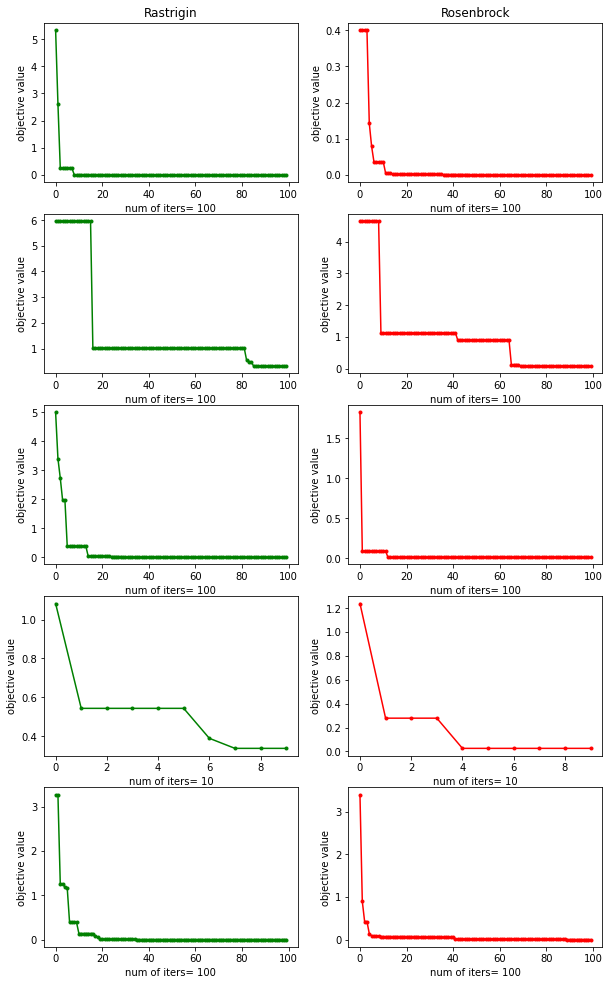

In [159]:
plt.figure(figsize=(10, 17))

p = random.sample(population_size, k=1)[0]
n = random.sample(num_iters, k=1)[0]
l = random.sample(limit, k=1)[0]

best_solution, obj_values, _ = ABC_algorithm(p, n, l, rastrigin)
plt.subplot(tmp, 2, 1)
plt.plot(range(n), obj_values, color='green', marker='.')
plt.xlabel("num of iters= " + str(n))
plt.ylabel("objective value")
plt.title('Rastrigin')

best_solution, obj_values, _ = ABC_algorithm(p, n, l, rosenbrock)
plt.subplot(tmp, 2, 2)
plt.plot(range(n), obj_values, color='red', marker='.')
plt.xlabel("num of iters= " + str(n))
plt.ylabel("objective value")
plt.title('Rosenbrock')


for i in range(1, tmp):
  p = random.sample(population_size, k=1)[0]
  n = random.sample(num_iters, k=1)[0]
  l = random.sample(limit, k=1)[0]

  best_solution, obj_values, _30 = ABC_algorithm(p, n, l, rastrigin)
  plt.subplot(tmp, 2, 2*i+1)
  plt.plot(range(n), obj_values, color='green', marker='.')
  plt.xlabel("num of iters= " + str(n))
  plt.ylabel("objective value")

  best_solution, obj_values, _ = ABC_algorithm(p, n, l, rosenbrock)
  plt.subplot(tmp, 2, 2*i+2)
  plt.plot(range(n), obj_values, color='red', marker='.')
  plt.xlabel("num of iters= " + str(n))
  plt.ylabel("objective value")

plt.show()